Movie Recommender (Using KNN and Cosine Distance)

In [3]:
import numpy as np
import pandas as pd

In [4]:
df1 = pd.read_csv('Dataset\movie_small.csv')
df2 = pd.read_csv('Dataset\\ratings_small.csv')

In [5]:
movie = pd.DataFrame()
movie = pd.merge(df1,df2, on = 'movieId')

In [6]:
movie.drop(['genres'],axis = 1, inplace = True)
movie

,movieId,title,userId,rating
0,1,Toy Story (1995),6,5.0
1,1,Toy Story (1995),8,4.0
2,1,Toy Story (1995),10,4.0
3,1,Toy Story (1995),23,4.0
4,1,Toy Story (1995),39,5.0
...,...,...,...,...
2362,69481,"Hurt Locker, The (2008)",6762,4.0
2363,69746,Watchmen: Tales of the Black Freighter (2009),1513,5.0
2364,69784,BrÃ¼no (Bruno) (2009),6778,1.5
2365,69951,"Imaginarium of Doctor Parnassus, The (2009)",1513,5.0


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ratings = pd.DataFrame(movie.groupby('title')['rating'].mean())
ratings['no. of ratings'] = pd.DataFrame(movie.groupby('title')['rating'].count())
ratings

,rating,no. of ratings
title,,
'Round Midnight (1986),4.00,1
10 Things I Hate About You (1999),4.25,2
101 Dalmatians (1996),3.50,1
1492: Conquest of Paradise (1992),3.00,1
1900 (Novecento) (1976),3.00,1
...,...,...
Z (1969),2.00,1
Zack and Miri Make a Porno (2008),3.50,1
Zoolander (2001),2.25,2


<AxesSubplot: >

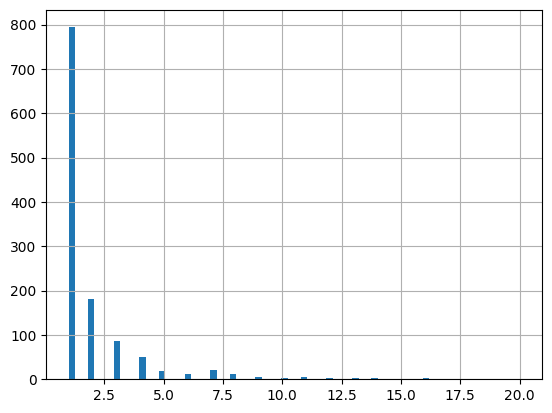

In [9]:
plt.Figure(figsize = (10,4))
ratings['no. of ratings'].hist(bins = 70)

<AxesSubplot: >

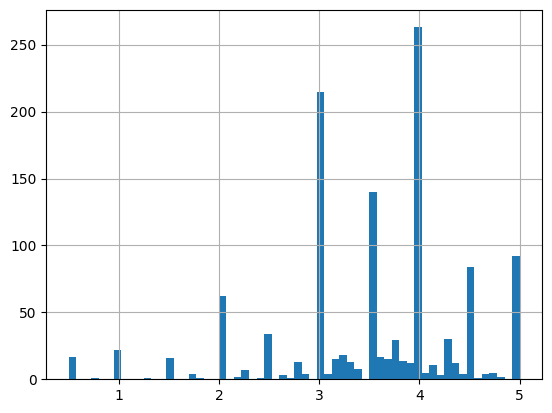

In [10]:
plt.Figure(figsize = (10,4))
ratings['rating'].hist(bins = 60)

In [11]:
moviemat = pd.pivot_table(movie, index = 'title', columns = 'userId', values = 'rating')
moviemat.fillna(moviemat.mean(),inplace = True)
moviemat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,6762,6778,6779,6781,6783,6784,6793,6794,6989,7120
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,4.25,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.487805,4.09375
10 Things I Hate About You (1999),3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,4.25,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.487805,4.09375
101 Dalmatians (1996),3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,4.25,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.487805,4.09375
1492: Conquest of Paradise (1992),3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,4.25,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.487805,4.09375
1900 (Novecento) (1976),3.707031,4.0,4.416667,3.571429,4.409091,3.782609,3.289062,3.542857,2.842105,4.0,...,4.25,3.552632,3.75,3.625,3.925,3.767442,4.076923,4.5,3.487805,4.09375


In [12]:
from scipy.sparse import csr_matrix
movie_matrix = csr_matrix(moviemat.values)
movie_matrix

<1205x74 sparse matrix of type '<class 'numpy.float64'>'
	with 89170 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(movie_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [16]:

np.random.seed(5)
movie_id = np.random.choice(moviemat.shape[0])
distances, indices = model.kneighbors(moviemat.iloc[movie_id,:].values.reshape(1,-1),n_neighbors=6)
print(distances)
print(indices)

[[4.4408921e-16 4.4408921e-16 4.4408921e-16 4.4408921e-16 4.4408921e-16
  4.4408921e-16]]
[[1001  439  316   14 1062 1182]]


In [17]:
d = distances.flatten()
for i in range(0,len(d)):
    if i == 0:
        print("Recommendation for {0}: \n".format(moviemat.index[movie_id]))
    else:
        ind = moviemat.index[indices.flatten()]
        print("{0}: {1} with distance: {2}\n".format(i,ind[i],d[i]))


Recommendation for Purple Rose of Cairo, The (1985): 

1: Full Monty, The (1997) with distance: 4.440892098500626e-16

2: Dirty Dancing (1987) with distance: 4.440892098500626e-16

3: 400 Blows, The (Les quatre cents coups) (1959) with distance: 4.440892098500626e-16

4: Tale of Springtime, A (Conte de Printemps) (1990) with distance: 4.440892098500626e-16

5: Witness for the Prosecution (1957) with distance: 4.440892098500626e-16



In [ ]:
import pickle 
saved_model = pickle.dump(model,open('model.pkl','wb'))

In [60]:
def recommend1(movieName):
    distances, indices = model.kneighbors(moviemat.loc[movieName,:].values.reshape(1,-1),n_neighbors=7)
    print(distances)
    print(indices)
    d = distances.flatten()
    for i in range(0,len(d)):
        if i == 0:
            print("\nRecommendation for {0}: \n".format(movieName))
        else:
            ind = moviemat.index[indices.flatten()]
            print("{0}: {1} with distance: {2}\n".format(i,ind[i],d[i]))

In [59]:
recommend1("Toy Story (1995)")

[[1.11022302e-16 2.64922461e-03 2.67123659e-03 3.25161655e-03
  3.31272543e-03 3.35896177e-03 3.35896177e-03]]
[[1101  929  289 1143  105  182  165]]

Recommendation for Toy Story (1995): 

1: Sabrina (1995) with distance: 0.0026492246070145553

2: Dead Man Walking (1995) with distance: 0.002671236587010295

3: Waiting to Exhale (1995) with distance: 0.0032516165484147708

4: Basquiat (1996) with distance: 0.003312725425715146

5: Browning Version, The (1994) with distance: 0.003358961774523217

6: Boys of St. Vincent, The (1992) with distance: 0.003358961774523217



In [79]:
def recommend2(movieName):
    distances, indices = model.kneighbors(moviemat.loc[movieName,:].values.reshape(1,-1),n_neighbors=7)
    movie_list = {}
    print(distances)
    print(indices)
    d = distances.flatten()
    for i in range(0,len(d)):
        if i > 0:
            ind = moviemat.index[indices.flatten()]
            # print("{0}: {1} with distance: {2}\n".format(i,ind[i],d[i]))
            movie_list[ind[i]] = d[i]
    df = pd.DataFrame(movie_list.items(), columns=['Movie Name','Closeness'])
    return df

In [81]:
recommendations = recommend2("Sabrina (1995)")
recommendations

[[0.         0.0007695  0.00100758 0.00131806 0.0013511  0.00138134
  0.00141406]]
[[ 929 1143  715 1124  858  797 1112]]


,Movie Name,Closeness
0,Waiting to Exhale (1995),0.000769
1,Mighty Aphrodite (1995),0.001008
2,Up Close and Personal (1996),0.001318
3,Primal Fear (1996),0.001351
4,"Nutty Professor, The (1996)",0.001381
5,"Truth About Cats & Dogs, The (1996)",0.001414
